In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

df = pd.read_csv("airquality.csv", sep =',')

In [ ]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5


In [ ]:
df.shape

(153, 6)

**a. How many missing values are present for each variable?**

In [ ]:
#Missing calues for each variable
df.isnull().sum()

Ozone      37
Solar.R     7
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

In [ ]:
!pip install missingno 
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


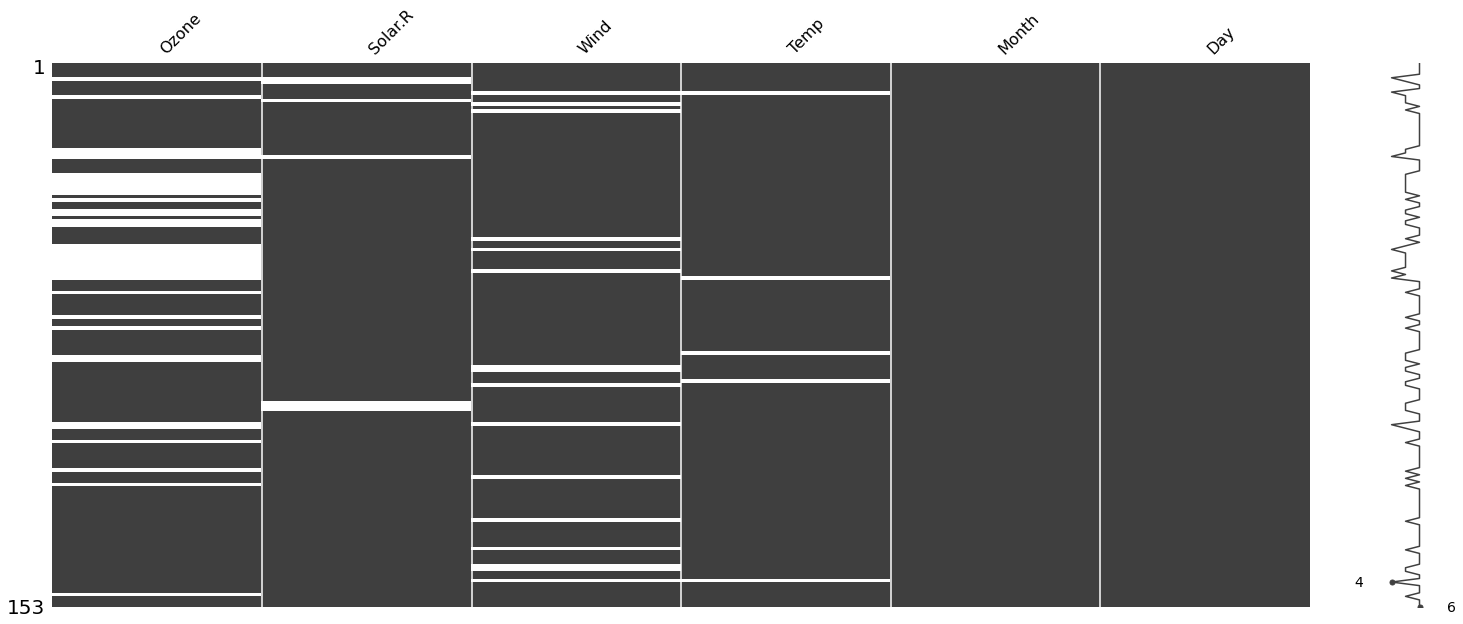

In [ ]:
#Detecting missing values and their distribution
msno.matrix(df)

**b.Create a data frame of comlete cases and find the mean temperature using listwise deletion**

In [ ]:
#New data frame using listwise deletion
dflistwdel = df.copy()

dflistwdel=df.dropna(how='any')

In [ ]:
dflistwdel.shape

(96, 6)

In [ ]:
#Checking that the new data frame does not have empty values
dflistwdel.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [ ]:
#Finding the maan temperature using litwise deletion
dflistwdel['Temp'].mean()

77.98958333333333

**c. Find the mean temperature using pairwise deletion**

In [ ]:
dfpairwdel =df.copy()

##pandas skips the missing values and calculates mean of the remaining values
dfpairwdel['Temp'].mean()



77.91216216216216

**d. Which rows contain missing temperature values?**

In [ ]:
df['Temp'].isnull().sum()

5

**e. Create a box plot for air quality data. Interpret the plot to explain why there are differences in the mean temperature**

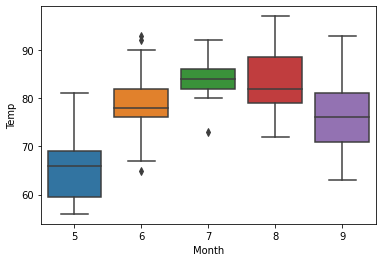

In [ ]:
sns.boxplot(x='Month', y='Temp', data=df)

In the sixth month we can find more outliers and in the seventh month only one is found. For the other months there are no outliers. This could happen since the mean of month 6 to comparison 5 is significantly different, the temperature changes between those months were very different. Even the average temperature of month 5 is significantly different from that of the other months.

**f. How many of the ozone values are outliers?. What area the ozone outlier values?, Create a new data frame called ozone_complete that has all rows with ozone outliers removed**

In [ ]:
#find out quick stadistics
df['Ozone'].describe()

count    116.000000
mean      42.129310
std       32.987885
min        1.000000
25%       18.000000
50%       31.500000
75%       63.250000
max      168.000000
Name: Ozone, dtype: float64

In [ ]:
#Quartile 1 and 3
Q1 = df.Ozone.quantile(0.25)
Q3 = df.Ozone.quantile(0.75)

Q1,Q3

(18.0, 63.25)

In [ ]:
#Interquartile Range
IQR = Q3 -Q1
IQR

45.25

In [ ]:
#Limits
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit, upper_limit

(-49.875, 131.125)

In [ ]:
#New data frame without outliers
ozone_complete = df[~((df.Ozone<(Q1-1.5*IQR))|(df.Ozone>(Q3+1.5*IQR)))]
ozone_complete

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


Two outliers were found outside the ranges, these outliers were found above the upper range, that is, they were greater than 131.125

# Part 2

**a. Create a new data set called air_median from the air data set. Impute the missing solar radiation values with the MEDIAN of the non-missing radiations in the air_median dataset**

In [ ]:
#loop trough calculate the median into the Solar R column for the missing values
mediansolar = ['Solar.R']
air_median= df.copy()
for i in mediansolar:
  air_median.loc[air_median.loc[:,i].isnull(),i]=air_median.loc[:,i].median()

In [ ]:
air_median

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


**b. Create a new data set called air_mean from the air_median data set. Impute the missing temperature values with the mean temperature for the monthe that the temperature is missing from in the air_mean data set. For example, impute missing month 5 temperature values with the mean of the non-missing temperatures for month 5**

In [ ]:
#loop trough calculate the mean 
mean_value = df.groupby('Month')['Temp'].mean
meantemp = df['Temp'].mean()
meantemp = ['Temp']
air_mean= air_median
for i in meantemp:
  air_mean.loc[air_mean.loc[:,i].isnull(),i]=air_mean.loc[:,i].mean()

In [ ]:
mean_value

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fe5a8965f10>>

In [ ]:
air_mean

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


**c. Create a new data set called air_ratio from the air_mean data set. Impute the missing values of the Ozone variable using ratio imputation in the air_ratio data set** 

In [ ]:
a = air_mean.isnull().sum()/len(air_mean)*100
variables = air_mean.columns

a



Ozone      24.183007
Solar.R     0.000000
Wind       10.457516
Temp        0.000000
Month       0.000000
Day         0.000000
dtype: float64

In [ ]:
variables

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [ ]:
variable = [ ]

for i in range(air_mean.columns.shape[0]):
    if a[i]<=70:
      variable.append(variables[i])

In [ ]:
air_ratio = air_mean[variable]
air_ratio

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


**d. Create a new data set called air_complete from the air_ratio data set. Use linear regression to impute the missing values of Wind using Ozone as the independent variable in the air_complete data set**

In [ ]:
air_complete = air_ratio[['Ozone','Wind']]
air_complete

,Ozone,Wind
0,41.0,7.4
1,36.0,8.0
2,12.0,12.6
3,18.0,11.5
4,NaN,14.3
...,...,...
148,30.0,6.9
149,NaN,13.2
150,14.0,14.3
151,18.0,8.0


In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(air_complete)
imputed=imp.transform(air_complete)



In [ ]:
imputed_to_df=pd.DataFrame(imputed)
imputed_to_df.columns=[['Ozone', 'Wind']]
imputed_to_df

,Ozone,Wind
0,41.000000,7.4
1,36.000000,8.0
2,12.000000,12.6
3,18.000000,11.5
4,14.944354,14.3
...,...,...
148,30.000000,6.9
149,21.628438,13.2
150,14.000000,14.3
151,18.000000,8.0


In [ ]:
imputed_to_df.head(10)

,Ozone,Wind
0,41.000000,7.400000
1,36.000000,8.000000
2,12.000000,12.600000
3,18.000000,11.500000
4,14.944354,14.300000
5,28.000000,14.900000
6,23.000000,8.600000
7,19.000000,13.800000
8,8.000000,12.594846
9,49.580065,8.600000


In [ ]:
!pip install nbconvert
!jupyter nbconvert --to html /content/A00239383_Leon.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook /content/A00239383_Leon.ipynb to html
[NbConvertApp] Writing 395937 bytes to /content/A00239383_Leon.html
